<a href="https://colab.research.google.com/github/Ahmed-naeem-10/firstgit/blob/main/logistiic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import zipfile
import os

zip_path = '/content/archive (6).zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


/content/dataset/catvnoncat/test_catvnoncat.h5
/content/dataset/catvnoncat/train_catvnoncat.h5


Available datasets in the file:
['list_classes', 'train_set_x', 'train_set_y']
X_train shape: (209, 64, 64, 3)
Y_train shape: (209,)
Classes: [b'non-cat' b'cat']


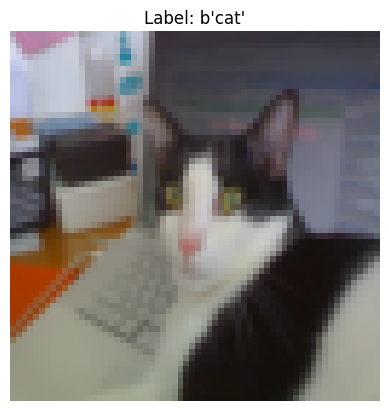


First few labels:
   Label
0      0
1      0
2      1
3      0
4      0


In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/dataset/catvnoncat/train_catvnoncat.h5'
file = h5py.File(file_path, 'r')

print("Available datasets in the file:")
print(list(file.keys()))

X_train = np.array(file['train_set_x'])
Y_train = np.array(file['train_set_y'])
classes = np.array(file['list_classes'])

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Classes: {classes}")

plt.imshow(X_train[index])
plt.title(f"Label: {classes[Y_train[index]]}")
plt.axis('off')
plt.show()

df = pd.DataFrame({'Label': Y_train})
print("\nFirst few labels:")
print(df.head())


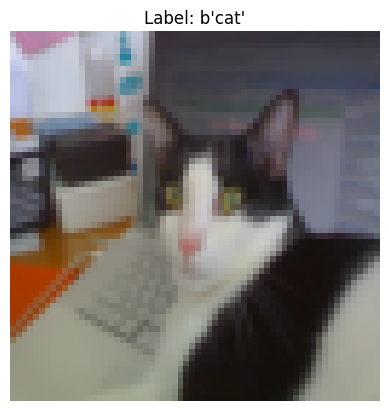

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_file = h5py.File('/content/dataset/catvnoncat/train_catvnoncat.h5', 'r')
X_train = np.array(train_file['train_set_x'])
Y_train = np.array(train_file['train_set_y']).reshape(-1, 1)
classes = np.array(train_file['list_classes'])

index = 111
plt.imshow(X_train[index])
plt.title(f"Label: {classes[Y_train[index][0]]}")
plt.axis('off')
plt.show()

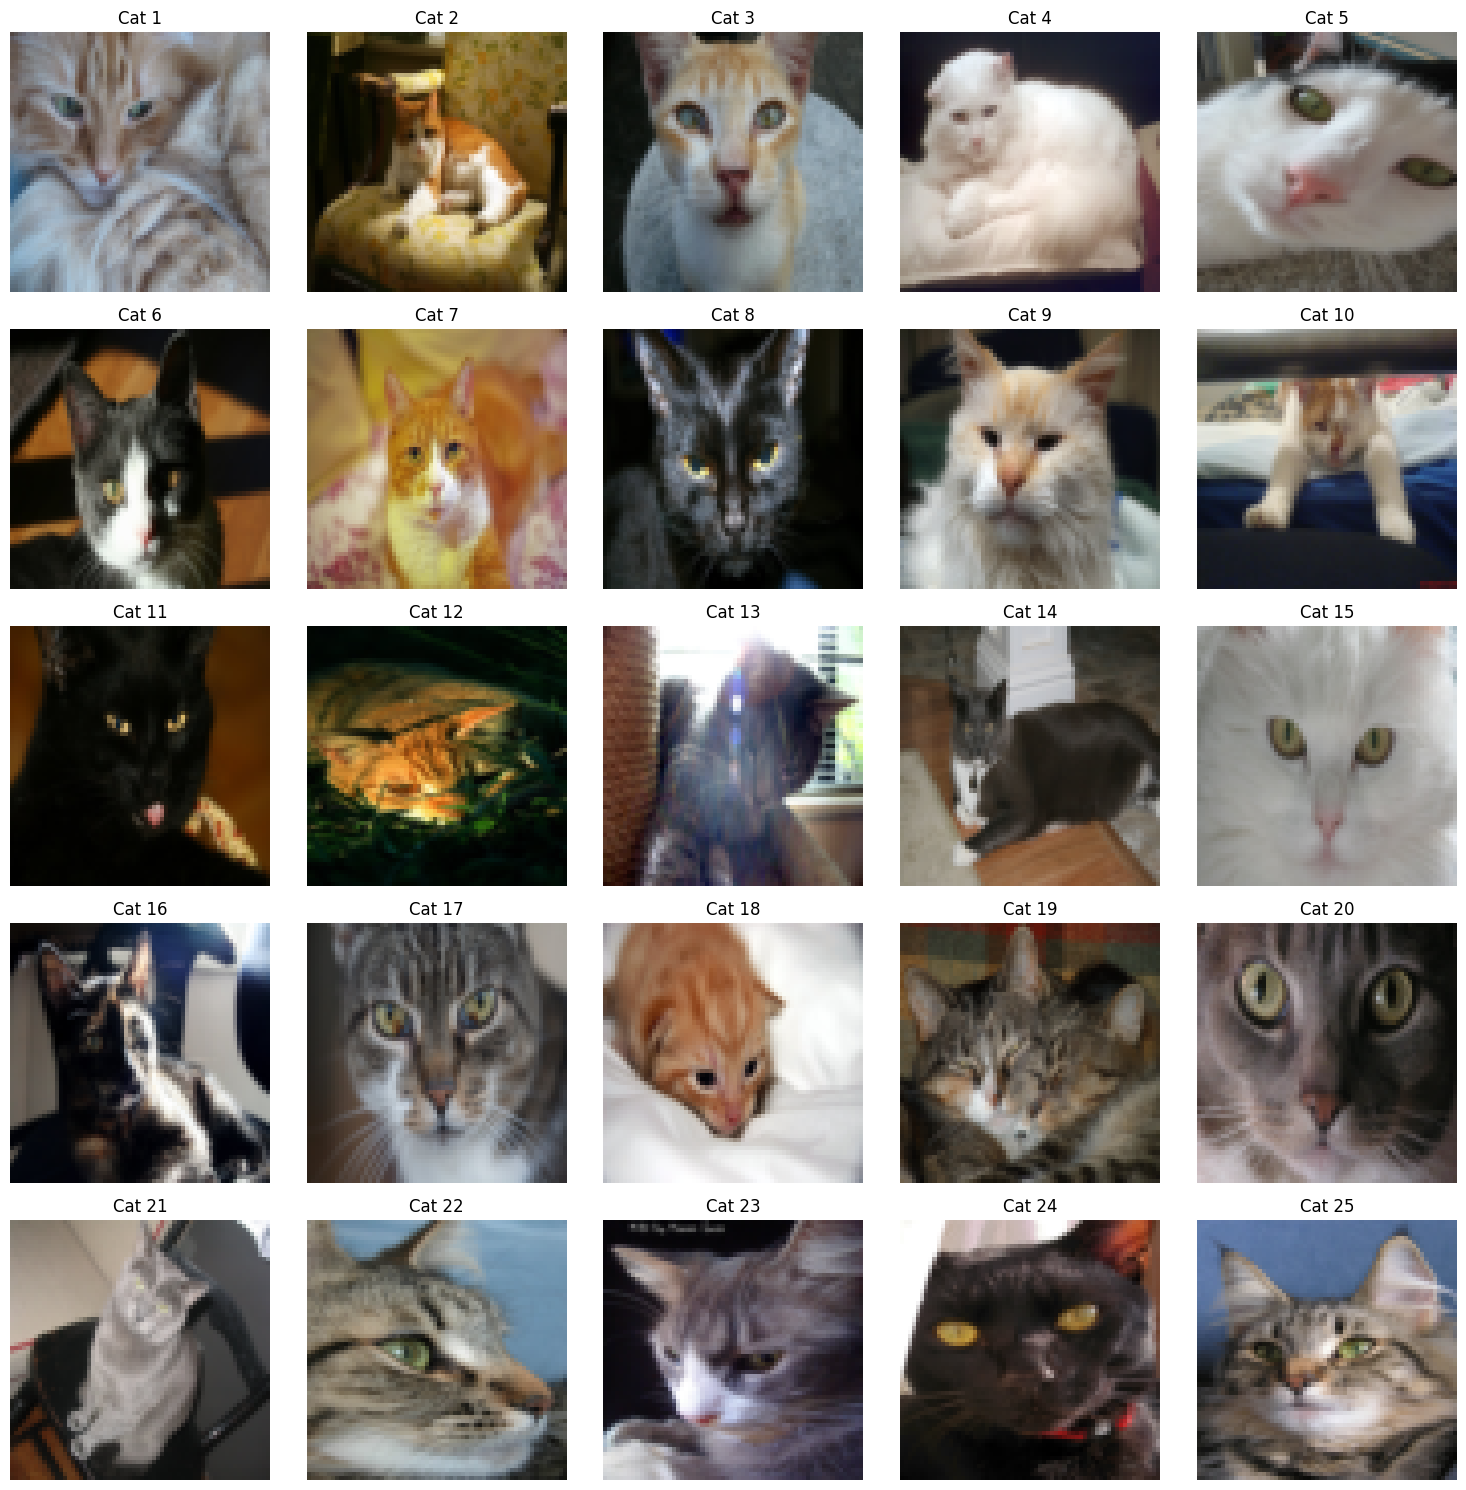

In [ ]:
import matplotlib.pyplot as plt

num_examples = X_train.shape[0]

plt.figure(figsize=(15, 15))

cat_count = 0

for i in range(num_examples):
    if Y_train[i][0] == 1:
        cat_count += 1
        plt.subplot(5, 5, cat_count)
        plt.imshow(X_train[i])
        plt.title(f"Cat {cat_count}")
        plt.axis('off')

        if cat_count == 25:
            break

plt.tight_layout()
plt.show()

In [ ]:
m_train = X_train.shape[0]

X_train_flat = X_train.reshape(m_train, -1).T
Y_train = Y_train.T

X_train_norm = X_train_flat / 255.0

print(f"X_train_norm shape: {X_train_norm.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train_norm shape: (12288, 209)
Y_train shape: (1, 209)


In [ ]:
def initialize_perceptron(n_x):
    w = np.zeros((n_x, 1))
    b = 0.0
    return w, b

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(w, b, X):
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    return A

In [ ]:
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8))
    return np.squeeze(cost)

In [ ]:
def backward(X, A, Y):
    m = X.shape[1]
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    return dw, db

In [ ]:
def update(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [ ]:
def train_perceptron(X, Y, num_iterations=1000, learning_rate=0.005):
    n_x = X.shape[0]
    w, b = initialize_perceptron(n_x)

    for i in range(num_iterations):
        A = forward(w, b, X)
        cost = compute_cost(A, Y)
        dw, db = backward(X, A, Y)
        w, b = update(w, b, dw, db, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b

In [ ]:
def predict(w, b, X):
    A = forward(w, b, X)
    predictions = (A > 0.5).astype(int)
    return predictions

In [ ]:
w, b = train_perceptron(X_train_norm, Y_train, num_iterations=2000, learning_rate=0.01)
preds = predict(w, b, X_train_norm)

accuracy = 100 - np.mean(np.abs(preds - Y_train)) * 100
print(f"Training accuracy: {accuracy:.2f}%")

Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.8239
Iteration 200, Cost: 0.4189
Iteration 300, Cost: 0.6173
Iteration 400, Cost: 0.5221
Iteration 500, Cost: 0.3877
Iteration 600, Cost: 0.2363
Iteration 700, Cost: 0.1542
Iteration 800, Cost: 0.1353
Iteration 900, Cost: 0.1250
Iteration 1000, Cost: 0.1165
Iteration 1100, Cost: 0.1092
Iteration 1200, Cost: 0.1028
Iteration 1300, Cost: 0.0971
Iteration 1400, Cost: 0.0920
Iteration 1500, Cost: 0.0875
Iteration 1600, Cost: 0.0833
Iteration 1700, Cost: 0.0795
Iteration 1800, Cost: 0.0760
Iteration 1900, Cost: 0.0728
Training accuracy: 99.52%
